In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fullset/testset (1).csv
/kaggle/input/fullset/trainset (1).csv


In [29]:
df=pd.read_csv("/kaggle/input/fullset/trainset (1).csv")
df_test=pd.read_csv("/kaggle/input/fullset/testset (1).csv")

In [35]:
df.shape[0]

39136

In [32]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tb_latitude', 'tb_longitude',
       'collision_time', 'accident_year', 'month', 'day_of_week', 'weather_1',
       'accident'],
      dtype='object')

In [9]:
df.drop(columns='Unnamed: 0.1',inplace=True)


In [10]:
df.head()

,Unnamed: 0,tb_latitude,tb_longitude,collision_time,accident_year,month,day_of_week,weather_1,accident
0,4,37.769411,-122.410931,5,2016,1,1,1,1
1,5,37.769411,-122.410931,8,2016,1,5,6,0
2,6,37.769411,-122.410931,1,2016,1,6,5,0
3,7,37.769411,-122.410931,9,2016,8,3,4,0
4,8,37.773139,-122.471762,4,2016,1,6,2,1


In [33]:
df.drop(columns=['Unnamed: 0','accident_year','Unnamed: 0.1'],inplace=True)

In [36]:
df.shape[0]

39136

In [37]:
df.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1,accident
0,37.769411,-122.410931,5,1,1,1,1
1,37.769411,-122.410931,8,1,5,6,0
2,37.769411,-122.410931,1,1,6,5,0
3,37.769411,-122.410931,9,8,3,4,0
4,37.773139,-122.471762,4,1,6,2,1


In [14]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,tb_latitude,tb_longitude,collision_time,accident_year,month,day_of_week,weather_1,accident
0,0,0,37.782518,-122.464393,5,2019,10,6,1,1
1,1,1,37.782518,-122.464393,12,2019,12,1,10,0
2,2,2,37.782518,-122.464393,3,2019,4,6,5,0
3,3,3,37.782518,-122.464393,5,2019,3,2,4,0
4,168,168,37.779793,-122.410201,6,2019,2,2,1,1


In [38]:
df_test.drop(columns=['Unnamed: 0','accident_year',"Unnamed: 0.1"],inplace=True)

In [40]:
df_test.shape[0]

13692

In [17]:
df_test.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1,accident
0,37.782518,-122.464393,5,10,6,1,1
1,37.782518,-122.464393,12,12,1,10,0
2,37.782518,-122.464393,3,4,6,5,0
3,37.782518,-122.464393,5,3,2,4,0
4,37.779793,-122.410201,6,2,2,1,1


In [19]:
df.columns

Index(['tb_latitude', 'tb_longitude', 'collision_time', 'month', 'day_of_week',
       'weather_1', 'accident'],
      dtype='object')

In [53]:
df = df.sample(frac=1).reset_index(drop=True)

In [54]:
df.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1,accident
0,37.748365,-122.408680,11,5,3,1,1
1,37.780280,-122.480451,2,7,4,8,0
2,37.779749,-122.415119,10,2,1,3,0
3,37.785280,-122.424676,1,9,4,3,0
4,37.719736,-122.407977,1,8,4,5,0


In [55]:
df.shape[0]

39136

In [56]:
feature_cols = ['tb_latitude', 'tb_longitude', 'collision_time', 'month', 'day_of_week',
       'weather_1']

X = df[feature_cols] # Features
y = df.accident # Target variable

In [22]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [57]:
X.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1
0,37.748365,-122.408680,11,5,3,1
1,37.780280,-122.480451,2,7,4,8
2,37.779749,-122.415119,10,2,1,3
3,37.785280,-122.424676,1,9,4,3
4,37.719736,-122.407977,1,8,4,5


In [58]:
df_test=df_test.sample(frac=1).reset_index(drop=True)

In [59]:
df_test.head()

,tb_latitude,tb_longitude,collision_time,month,day_of_week,weather_1,accident
0,37.741017,-122.405134,5,11,1,1,1
1,37.787964,-122.410982,6,7,6,7,0
2,37.780361,-122.432113,9,8,2,1,1
3,37.720231,-122.396617,9,10,5,4,0
4,37.784753,-122.421193,8,3,4,9,0


In [60]:
X_test = df_test[feature_cols] # Features
y_test = df_test.accident # Target variable

In [61]:
X_test.shape[0]

13692

In [42]:
X.shape[0]

39136

In [62]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logre = LogisticRegression()

# fit the model with data
logre.fit(X,y)

#
y_pred=logre.predict(X_test)

In [63]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.280447
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               accident   No. Observations:                39136
Model:                          Logit   Df Residuals:                    39130
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                  0.5013
Time:                        17:45:12   Log-Likelihood:                -10976.
converged:                       True   LL-Null:                       -22008.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
tb_latitude       -1.1192      0.597     -1.875      0.061      -2.289       0.051
tb_longitude     

In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9223, 1046],
       [ 607, 2816]])

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

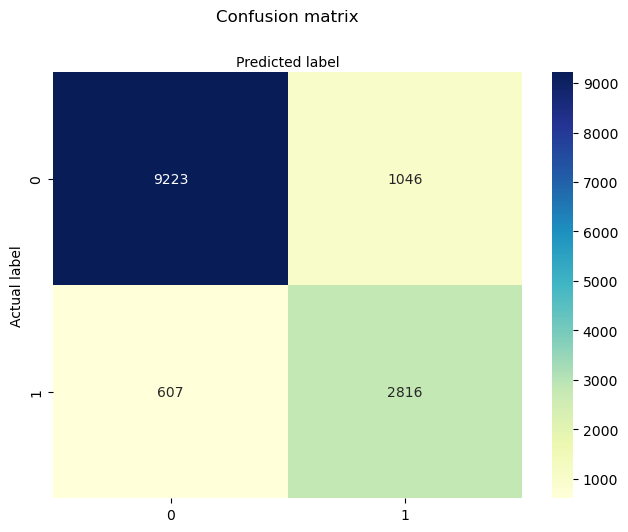

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8792725679228747
Precision: 0.7291558777835319
Recall: 0.8226701723634239


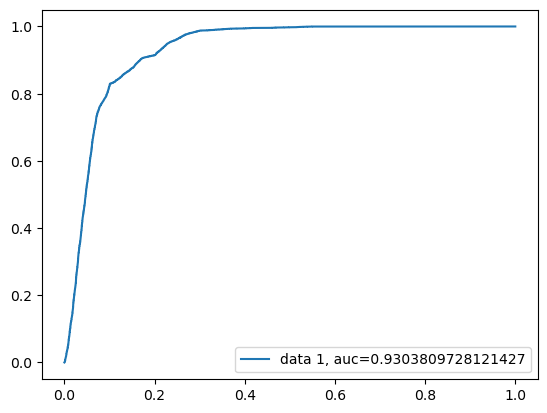

In [68]:
y_prob = logre.predict_proba(X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_prob)
auc = metrics.roc_auc_score(y, y_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [73]:
y_pred=logre.predict(np.array([37.787964,-122.410982,6,7,6,7]).reshape(1,-1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [74]:
y_pred

array([0])